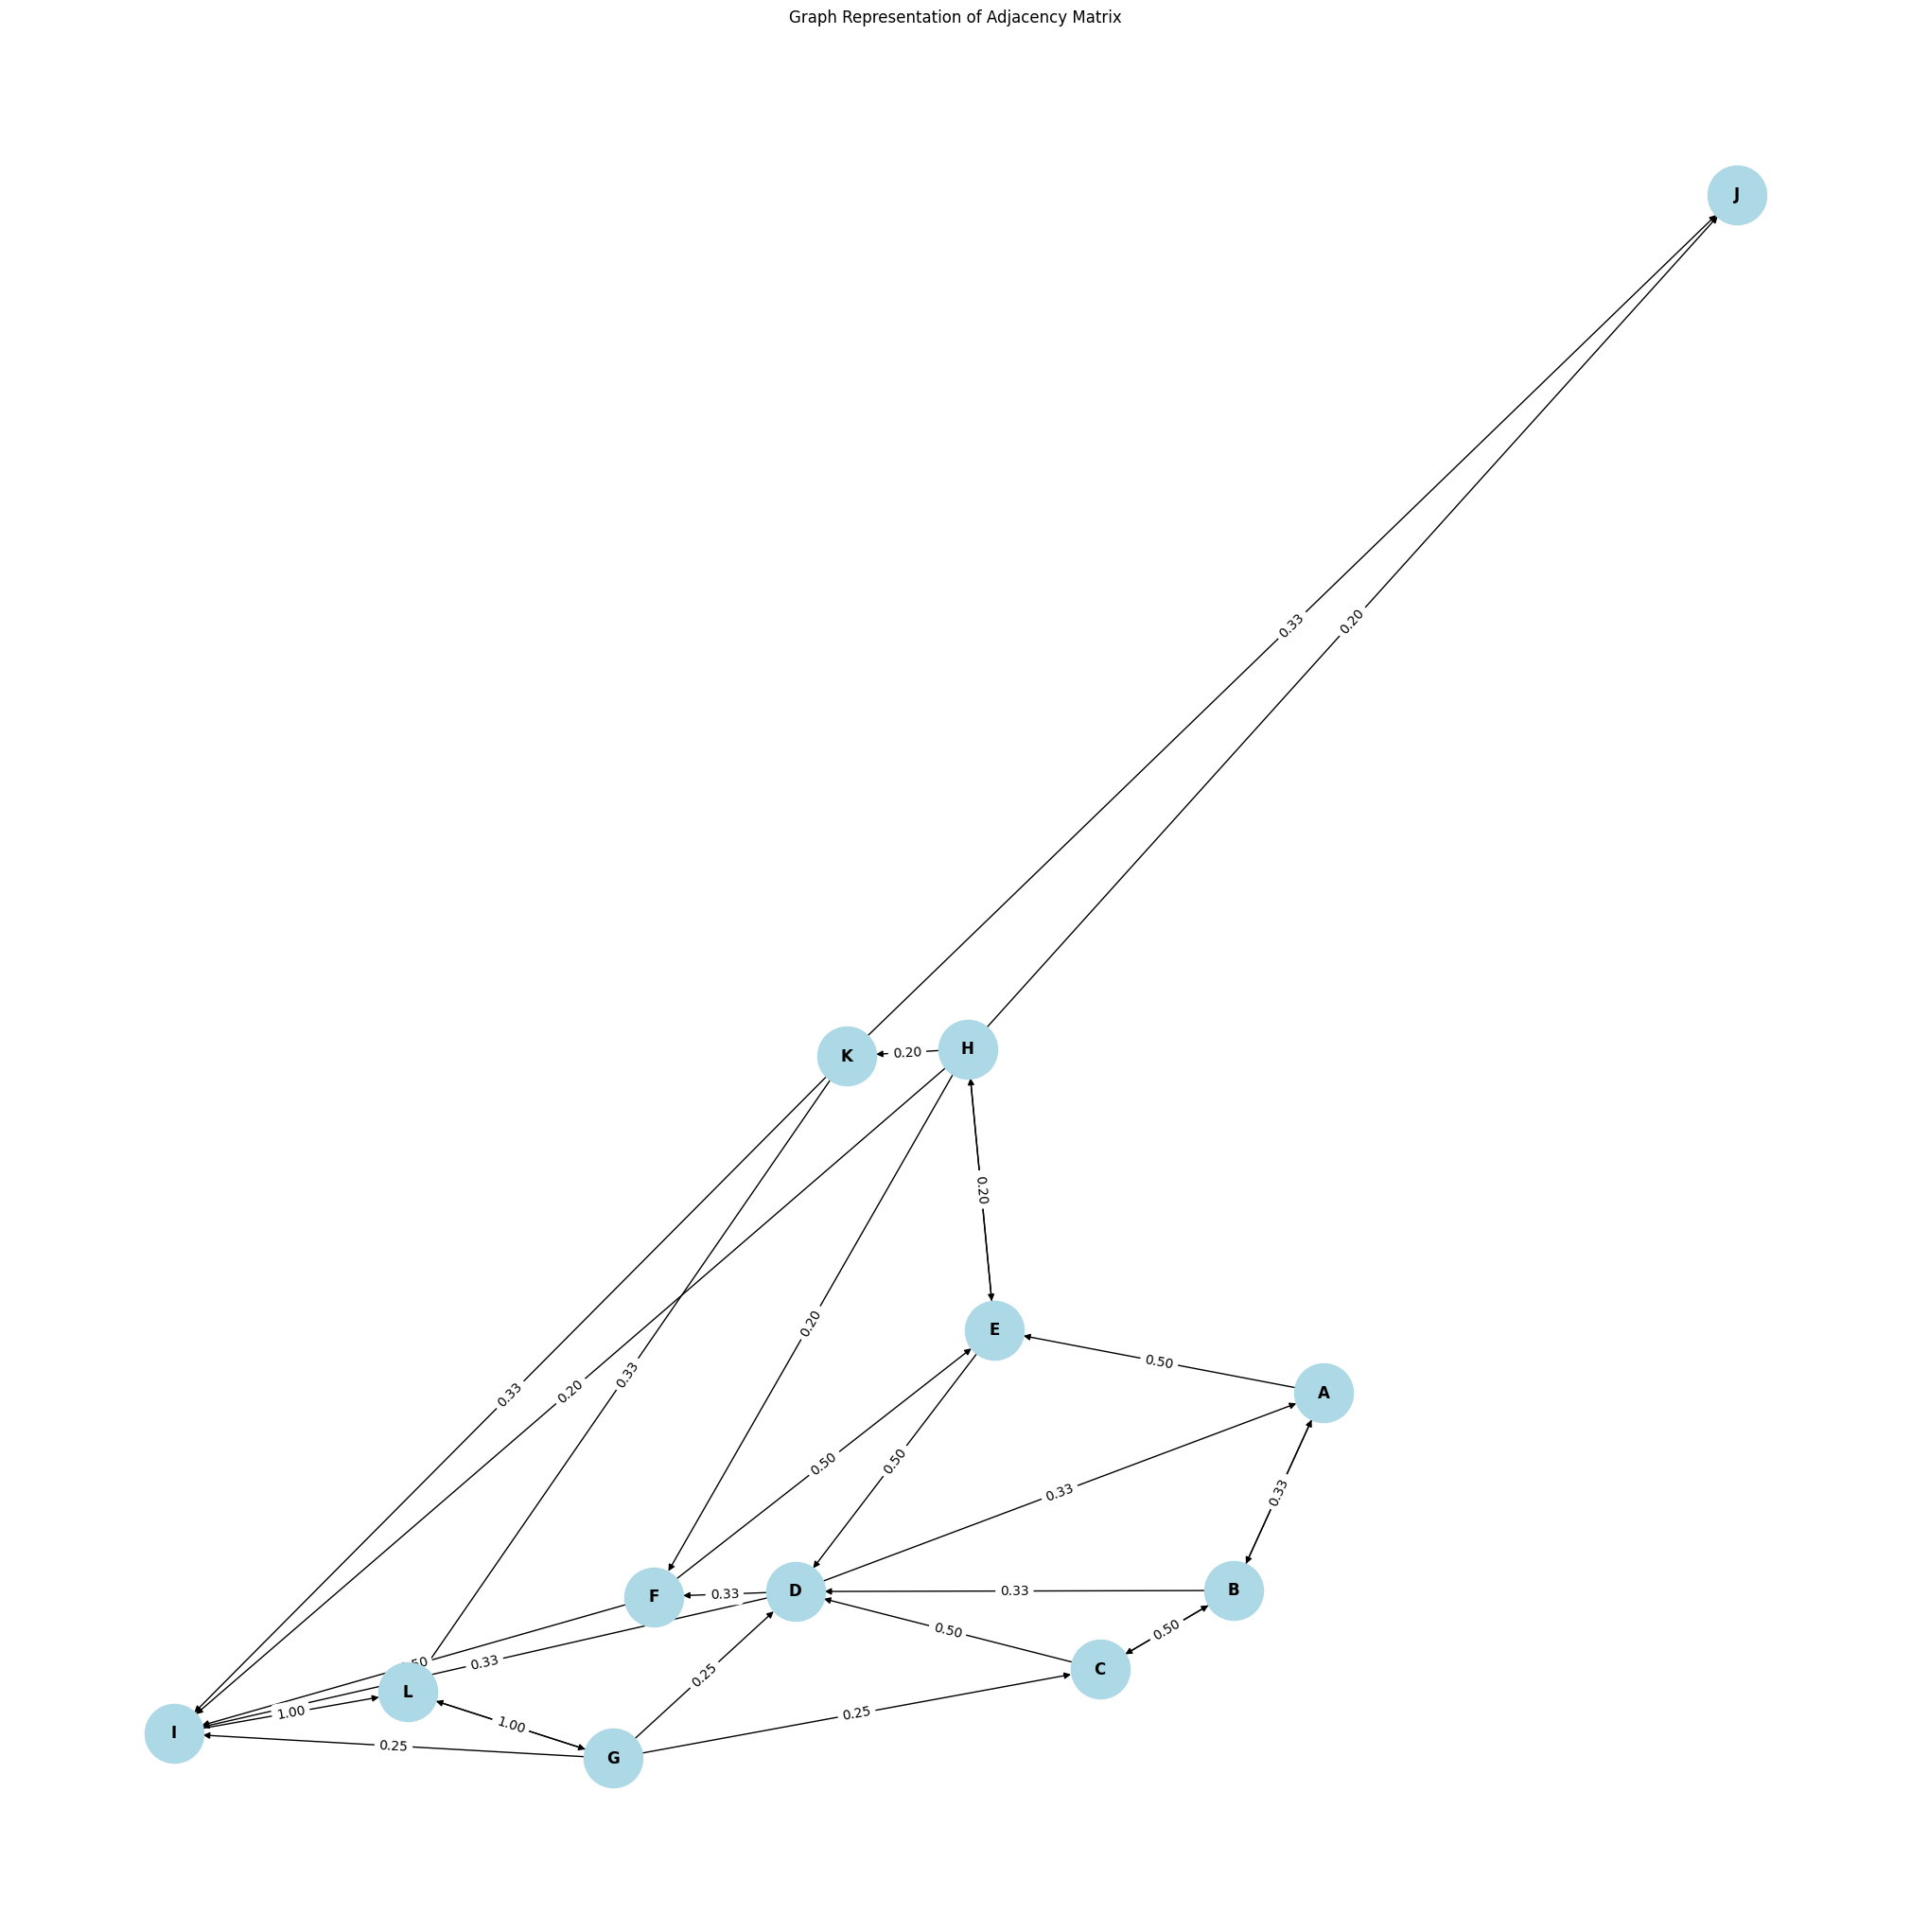

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Define the adjacency matrix
adj_matrix = np.array([
    [0, 1/2, 0, 0, 1/2, 0, 0, 0, 0, 0, 0, 0],       # A
    [1/3, 0, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0],     # B
    [0, 1/2, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0],       # C
    [1/3, 0, 0, 0, 0, 1/3, 0, 0, 1/3, 0, 0, 0],     # D
    [0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0, 0],       # E
    [0, 0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0],       # F
    [0, 0, 1/4, 1/4, 0, 0, 0, 0, 1/4, 0, 0, 1/4],   # G
    [0, 0, 0, 0, 1/5, 1/5, 0, 0, 1/5, 1/5, 1/5, 0], # H
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],           # I
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],           # J
    [0, 0, 0, 0, 0, 0, 0, 0, 1/3, 1/3, 0, 1/3],     # K
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]            # L
])

# Node labels
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

# Add nodes and edges to the graph
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if adj_matrix[i, j] > 0:
            G.add_edge(nodes[i], nodes[j], weight=adj_matrix[i, j])

# Draw the graph
pos = nx.spring_layout(G)
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}

plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title('Graph Representation of Adjacency Matrix')
plt.show()


In [25]:
# 1. Define the raw Google Matrix, G

import numpy as np

G = np.array([
    [0, 1/2, 0, 0, 1/2, 0, 0, 0, 0, 0, 0, 0],       # A
    [1/3, 0, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0],     # B
    [0, 1/2, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0],       # C
    [1/3, 0, 0, 0, 0, 1/3, 0, 0, 1/3, 0, 0, 0],     # D
    [0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0, 0],       # E
    [0, 0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0],       # F
    [0, 0, 1/4, 1/4, 0, 0, 0, 0, 1/4, 0, 0, 1/4],   # G
    [0, 0, 0, 0, 1/5, 1/5, 0, 0, 1/5, 1/5, 1/5, 0], # H
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],           # I
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],           # J
    [0, 0, 0, 0, 0, 0, 0, 0, 1/3, 1/3, 0, 1/3],     # K
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]            # L
])


In [26]:

# 2. Fix dangling nodes (rows with all zeros), and normalize
n = G.shape[0]
for i in range(n):
    if np.sum(G[i, :]) == 0:
        G[i, :] = 1 / n  # Distribute to all nodes

# Normalize G to ensure all rows sum to 1
G = G / G.sum(axis=1, keepdims=True)



In [27]:
# 3. Power method to find the principal eigenvector (PageRank vector)
def power_method(G, eps=1e-6, max_iter=100):
    n = G.shape[0]
    pi = np.ones(n) / n
    for i in range(max_iter):
        pi_new = G.T @ pi
        if np.linalg.norm(pi_new - pi, 1) < eps:
            break
        pi = pi_new
    return pi / np.sum(pi)

pi = power_method(G)


In [28]:

# 4. Construct the modified Google matrix with teleportation
alpha = 0.85
E = np.ones((n, n)) / n
G_tilde = alpha * G + (1 - alpha) * E


In [29]:

# 5. Power method on G_tilde
pi_tilde = power_method(G_tilde)


In [30]:

# 6. Normalization
pi = pi / np.sum(pi)
pi_tilde = pi_tilde / np.sum(pi_tilde)


In [31]:

# 7. Keyword data
keywords = [
    ["Apples", "Bananas", "Broccoli", "Cabbage", "Kumquats", "Strawberries"],                # Page A,0
    ["Oranges", "Plums", "Coconuts", "Kumquats", "Blueberries", "Cherries", "Strawberries"], # Page B,1
    ["Lettuce", "Spinach", "Bananas", "Blackberries", "Peas", "Strawberries"],               # Page C,2
    ["Oranges", "Onions", "Celery", "Kumquats", "Corn", "Radishes"],                         # Page D,3
    ["Pineapples", "Plums", "Corn", "Cherries", "Broccoli", "Peas", "Strawberries"],         # Page E,4
    ["Lettuce", "Onions", "Coconuts", "Spinach", "Peas", "Strawberries"],                    # Page F,5
    ["Apples", "Onions", "Broccoli", "Corn", "Cabbage", "Peas"],                             # Page G,6
    ["Plums", "Blueberries", "Raspberries", "Blackberries", "Strawberries"],                 # Page H,7
    ["Apples", "Cucumbers", "Carrots", "Spinach", "Corn", "Black Beans", "Cabbage"],         # Page I,8
    ["Mushrooms", "Carrots", "Lettuce", "Radishes", "Peppers", "Broccoli", "Spinach"],       # Page J,9
    ["Carrots", "Lettuce", "Celery", "Onions", "Cabbage", "Peas"],                           # Page K,10
    ["Broccoli", "Cabbage", "Carrots", "Spinach", "Corn", "Peas"]                            # Page L,11
]

# User query
query = ["Apples", "Bananas", "Broccoli", "Blueberries", "Blackberries", "Black Beans", "Cabbage", "Carrots", "Celery", "Cherries", "Coconuts", "Corn", "Cucumbers", "Kumquats", "Lettuce", "Mushrooms", "Onions", "Oranges", "Peas", "Peppers", "Pineapples", "Plums", "Radishes", "Raspberries", "Spinach", "Strawberries"]


In [32]:

# 8. Construct Term-Document Matrix T
terms = list(set([term for sublist in keywords for term in sublist]))  # Unique terms
T = np.zeros((len(terms), n))
for j in range(n):
    for term in keywords[j]:
        i = terms.index(term)
        T[i, j] = 1


In [33]:

# 9. Create query vector q
q = np.zeros(len(terms))
for term in query:
    if term in terms:
        q[terms.index(term)] = 1


In [34]:

# 10. Compute dᵀ = qᵀ T
d = q.T @ T


In [35]:

# 11. Rank webpages by importance and responsiveness
responsive_pages = np.argsort(-d)
importance_ranking = np.argsort(-pi_tilde)


In [36]:

# 12. Final ranking of responsive webpages based on importance
ranked_responsive_pages = [page for page in importance_ranking if d[page] > 0]

# Output results
print("Google Matrix (G):")
print(G)
print("\nPageRank Vector (pi):")
print(pi)
print("\nModified Google Matrix (G_tilde):")
print(G_tilde)
print("\nModified PageRank Vector (pi_tilde):")
print(pi_tilde)
print("\nQuery Vector (q):")
print(q)
print("\nTerm-Document Matrix (T):")
print(T)
print("\nResponsiveness Vector (d):")
print(d)
print("\nFinal Ranking of Responsive Webpages:")
print(ranked_responsive_pages)

Google Matrix (G):
[[0.         0.5        0.         0.         0.5        0.
  0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.         0.33333333
  0.         0.         0.33333333 0.         0.         0.        ]
 [0.         0.         0.         0.5        0.         0.
  0.         0.5        0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.5        0.
  0.         0.         0.5        0.         0.         0.        ]
 [0.         0.         0.25       0.25       0.         0.
  0.         0.         0.25       0.         0.         0.25      ]
 [0.         0.         0.         0.         0.2        0.2
  0.     